# The Sparks Foundation: Data Science and Business Analytics Internship


## Task 1 - Prediction Using Unsupervised ML
#### For this task, we have to preict the optimum number of clusters using the dataset 'Iris' and show its visual representation. 

### Steps to solve this problem: 
1) Reviewing the data

2) Analyzing the data

3) Visualing the data

5) Finding the optimum number of clusters

6) Training the data

6) Evaluting the accuracy of the model

### Dataset - https://bit.ly/3kXTdox

In [2]:
# Importing important libraries:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Understanding the correlation between the data given


In [9]:
#Finding the correlation between the features
iris_df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


### Visualising the dataset

<AxesSubplot:>

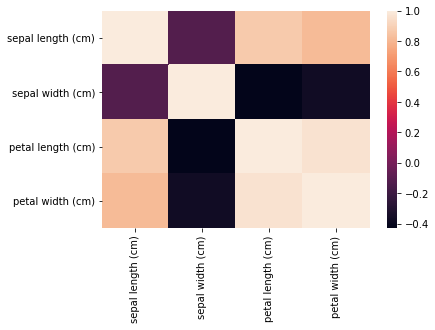

In [11]:
# Visualizing the correlation between the features
sns.heatmap(iris_df.corr())

### Finding the optimum number of clusters using Elbow method

G:\Pallavi\Software\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


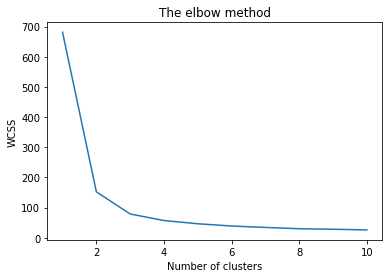

In [8]:
# Finding the optimum number of clusters for k-means classification

x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

### Training and Visualising the data

In [12]:
kmeans = KMeans(n_clusters=3)

kmeans.fit(x)

KMeans(n_clusters=3)

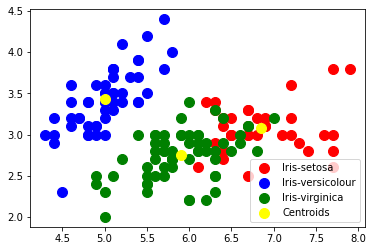

In [16]:
# Calculate the cluster labels: labels
labels = kmeans.predict(x)

# Visualising the clusters - On the first two columns
plt.scatter(x[labels == 0, 0], x[labels == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[labels == 1, 0], x[labels == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[labels == 2, 0], x[labels == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

For a more accurate representation, we need to normalise the data again and apply clustering again.

In [21]:
# Create scaler: scaler
scaler = Normalizer()

x = scaler.fit_transform(x)

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=3)

# Create pipeline: pipeline
kmeans.fit(x)

KMeans(n_clusters=3)

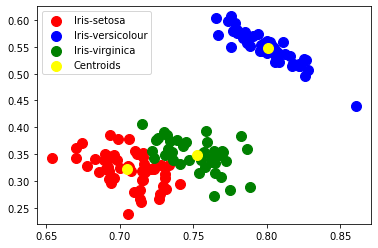

In [22]:
# Calculate the cluster labels: labels
labels = kmeans.predict(x)

# Visualising the clusters - On the first two columns
plt.scatter(x[labels == 0, 0], x[labels == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[labels == 1, 0], x[labels == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[labels == 2, 0], x[labels == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

As a result, we see that the data after being normalized has improved the clustering as compared to the un-normalized data.